# Sales Analysis

### Import Libraries

In [1]:
import pandas as pd
import os

### Task 1: Import and Merge all 12 csv files 

In [2]:
files = [file for file in os.listdir('SalesAnalysis/Sales_Data')]#listing the names of the csv files in that directory

all_months_data = pd.DataFrame()#creating a blank dataframe

for file in files:#looping through the csv file name
    df = pd.read_csv('SalesAnalysis/Sales_Data/'+file)#opening and reading the csv files (here 1st is the directory + file = csv file name )
    all_months_data = pd.concat([all_months_data,df])#adding the data of the opened csv in the dataframe
    
all_months_data.to_csv('all_data.csv',index=False)#converting the final df to another csv file 

### Read In Updated Dataframe

In [3]:
all_data= pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Clean Data

### See NAN

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)] #here axis=1 refers to columns
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


### Drop NAN

In [5]:
all_data = all_data.dropna(how = 'all') #here "how = all" means drop the row where all colums have nan value
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Finding  text from order date

In [6]:
temp_df = all_data[all_data["Order Date"].str[0:2]=="Or"]#here str is used to convert the date into list of string
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


### Droping text from Order Date

In [7]:
all_data = all_data[all_data["Order Date"].str[0:2]!="Or"]#here all the value in order date with "or" will be removed
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Convert Columns to correct Type

In [8]:
#here pd.to_numeric converts str to numeric type.
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

# Adding Additional Columns

### Task 2 : Adding Month Colums

In [9]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype("int32")#here astype is used to assign the type int from str
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Task 3 : Adding a Sales Column 

In [10]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


### Task 4 : Add a City Column

In [11]:
#here 1st x.split gets the city name , then 2nd time its takes the city with state and pincode and then it is spit to take the
#state name only and then the city and state are concatenated.
all_data['City'] = all_data['Purchase Address'].apply(lambda x :x.split(',')[1] + ' (' + x.split(',')[2].split(' ')[1] +')')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


### Task 5.0 : Converting order date to datetime

In [12]:
all_data['Order Date']= pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Task 5.1 : Extracting hr and minute in 2 columns

In [13]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute']= all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


# Data Exploration

## Question 1 : What as the best Month for Sales? How much was earned that month?

In [14]:
month_sales = all_data.groupby('Month').sum()
month_sales

,Quantity Ordered,Price Each,Sales,Hour,Minute
Month,,,,,
1,10903,1811768.38,1822256.73,139485,282440
2,13449,2188884.72,2202022.42,172669,354885
3,17005,2791207.83,2807100.38,218969,447559
4,20558,3367671.02,3390670.24,262259,544186
5,18667,3135125.13,3152606.75,238780,487899
6,15253,2562025.61,2577802.26,195528,402436
7,16072,2632539.56,2647775.76,206169,417349
8,13448,2230345.42,2244467.88,172289,353857
9,13109,2084992.09,2097560.13,168513,341698


### Ploting Month Vs Sales

Text(0.5, 0, 'Month Number')

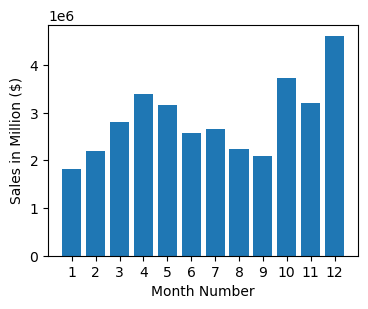

In [15]:
import matplotlib.pyplot as plt 
%matplotlib inline

month = range(1,13)
plt.figure(figsize=(4,3))
plt.bar(month,month_sales['Sales'])
plt.xticks(month)
plt.ylabel('Sales in Million ($)')
plt.xlabel('Month Number')


## Question 2:  What City had the highest number of sales?

In [16]:
city_sales = all_data.groupby('City').sum()
city_sales

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
City,,,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58,214264,442932
Austin (TX),11153,1809873.61,69829,1819581.75,141946,289060
Boston (MA),22528,3637409.77,141112,3661642.01,288225,590442
Dallas (TX),16730,2752627.82,104620,2767975.40,214390,435155
Los Angeles (CA),33289,5421435.23,208325,5452570.80,427444,866638
New York City (NY),27932,4635370.83,175741,4664317.43,357696,733598
Portland (ME),2750,447189.25,17144,449758.27,35211,72856
Portland (OR),11303,1860558.22,70621,1870732.34,144421,295533
San Francisco (CA),50239,8211461.74,315520,8262203.91,643265,1319477


### Ploting City vs Sales

Text(0.5, 0, 'City Names')

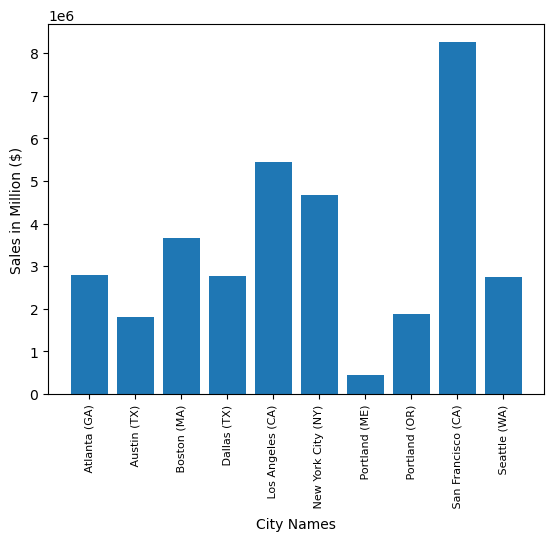

In [17]:
import matplotlib.pyplot as plt 
%matplotlib inline

#this is done to assign exact city name to their value or else by using unique the city names will be in an unorganized
#order and while ploting the city and their respective data will not match .
cities =[city for city,df in all_data.groupby('City')]

plt.bar(cities,city_sales['Sales'])
plt.xticks(cities,rotation = 'vertical',size =8)
plt.ylabel('Sales in Million ($)')
plt.xlabel('City Names')

## Question 3: What time should we display advertisements to maximize likelood of customers buying product?

In [18]:
hour_count = all_data.groupby('Hour').count()
hour_count

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


### Plot Line Chart of Hourly Order Volume

Text(0.5, 0, 'Hours')

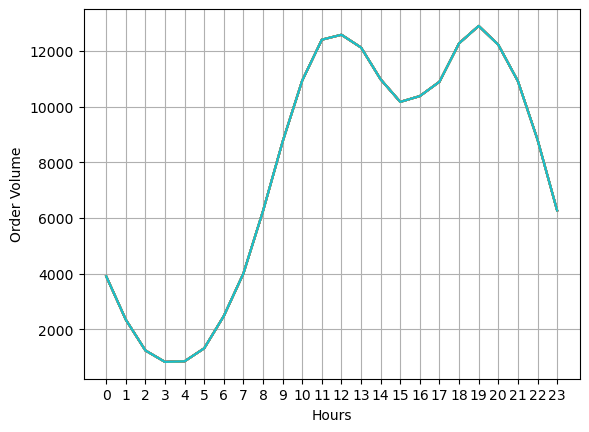

In [19]:
import matplotlib.pyplot as plt 
%matplotlib inline

hours =[hour for hour,df in all_data.groupby('Hour')]
plt.plot(hours,hour_count)
plt.xticks(hours)
plt.grid()
plt.ylabel('Order Volume')
plt.xlabel('Hours')

## Question 4 : What products are most often sold together?

In [20]:
df= all_data[all_data['Order ID'].duplicated(keep = False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()
df.head(25)

C:\Users\Amlanjyoti\AppData\Local\Temp\ipykernel_8028\3273726449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [28]:
from itertools import combinations
from collections import Counter

count=Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## Question 5 : What Product sold Most and why?

In [21]:
quantity_ordered = all_data.groupby('Product').sum()
quantity_ordered.head()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039


### Plot Product Vs Quantity Sold

Text(0.5, 0, 'Product Name')

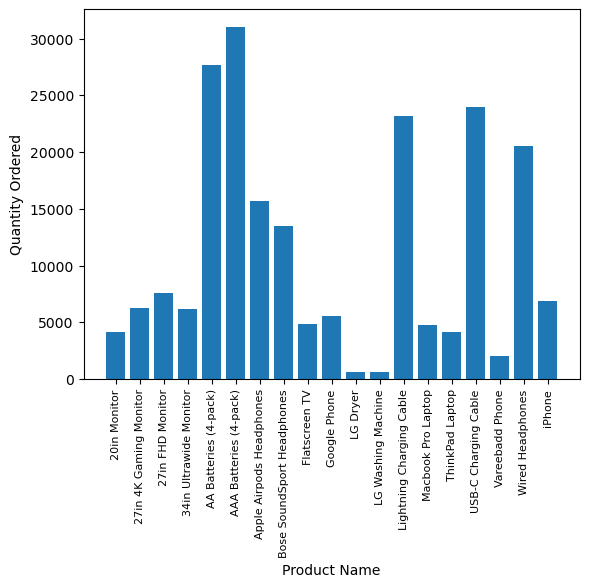

In [22]:
import matplotlib.pyplot as plt 
%matplotlib inline

products =[product for product,df in all_data.groupby('Product')]

plt.bar(products,quantity_ordered['Quantity Ordered'])
plt.xticks(products,rotation = 'vertical',size =8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product Name')

### Ploting Line chart over Bar Chart to find price vs quantity sold

In [23]:
price = all_data.groupby('Product').mean()['Price Each']
price

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\Amlanjyoti\AppData\Local\Temp\ipykernel_8028\2439702537.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size = 8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

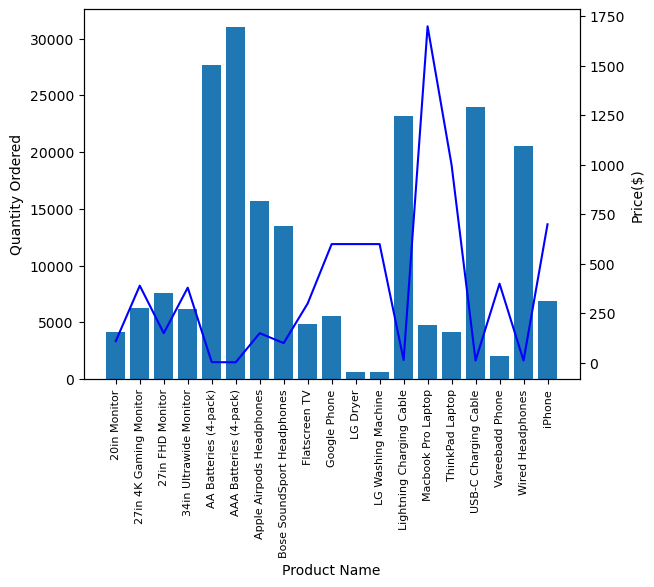

In [30]:

fig,ax1 =plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered['Quantity Ordered'])
ax2.plot(products,price,"b-")
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price($)')
ax1.set_xticklabels(products,rotation='vertical',size = 8)

